# Assignment 6: Segmentation and introduction in machine learning

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data
from skimage import filters
import skimage.morphology as morph
import skimage.segmentation as segment

## Exercise 1: Watershed segmentation

Read in the image $\texttt{pears.png}$ and segment the pears with the $\texttt{Watershed}$-algorithm implementing the following steps.

In [2]:
img = ski.io.imread("pears.png")

(a) Create a binary image containing the pears and generate the markers as local maxima of the distance to the background. Describe the procedure.

(b) Apply the $\texttt{Watershed}$-algorithm and describe what it is doing.

(c) What can you do to improve the segmentation result?

## Exercise 2: Ice on Mars

Take the $\texttt{mars.bmp}$ and estimate the characteristics of the planet applying the following steps.

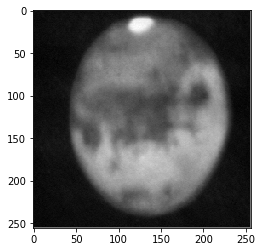

In [6]:
img = ski.io.imread("mars.bmp")
img = ski.color.rgb2gray(img)
plt.imshow(img, cmap='gray')

(a) Read in the image and obtain 3 binary images containing: space, planet, and the ice in the polar region using thresholding.

No handles with labels found to put in legend.


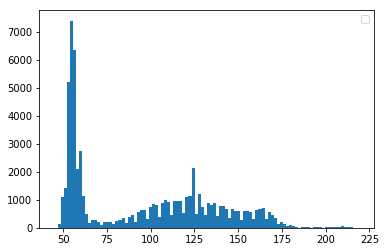

In [8]:
plt.hist(img.ravel(), bins=100)
plt.legend()

In [13]:
threshold_img_1 = img > 75
threshold_img_2 = img > 195

Text(0.5, 1.0, 'Threshold bigger than 195')

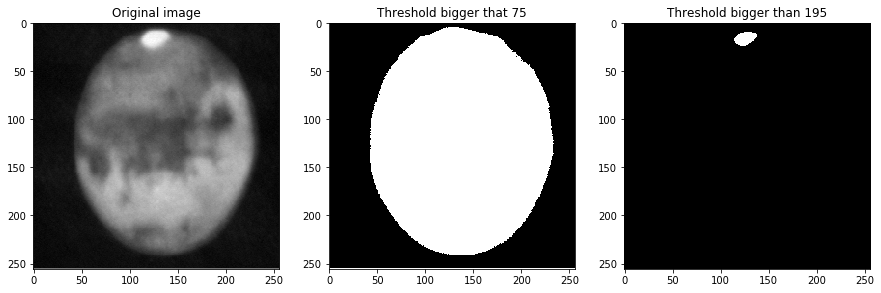

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15,15))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(threshold_img_1, cmap='gray')
ax[1].set_title("Threshold bigger that 75")
ax[2].imshow(threshold_img_2, cmap='gray')
ax[2].set_title("Threshold bigger than 195")

(b) Estimate the contour of the Planet and the Ice using the function $\texttt{active_contour}$ of the $\texttt{scikit-iamge.segmentation}$ module. Describe what the function is doing.

[0, 256, 256, 0]

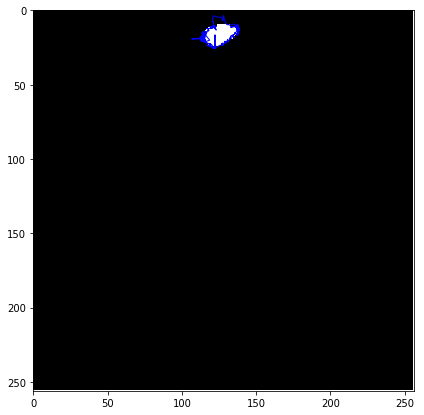

In [40]:
s = np.linspace(0, 2*np.pi, 400)
x = 120 + 20*np.cos(s)
y = 10 + 20*np.sin(s)
init = np.array([x, y]).T


snake = segment.active_contour(threshold_img_2,init)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(threshold_img_2, cmap=plt.cm.gray)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1)
ax.axis([0, img.shape[1], img.shape[0], 0])

(c) Find the center-of-mass of the planet. Describe the mathematical procedure behind it.

(d) Compute the center-of-mass of polar ice.

(e) Estimate the distance of the ice cap from the equator of the planet in km, assuming a scale of $s$ = 33.895 km/pixel.

(f) Compute the area ratio of the ice cap and planet.

## Exercise 3: Introduction to machine learning - the  MNIST database

The $\texttt{MNIST}$-dataset contains hand-written numbers which should be catagorized in the following with a $\texttt{k-nearest-neighbor}$-algorithm (kNN-algorithm).  On the webpage [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) you can find 4 datasets of the MNIST database.

(a) Familiarize yourself with the data how to read in the data format. Read-in the data according to the files into a training ($\texttt{train-images}$) and test ($\texttt{t10k-images}$) image-dataset and labels.

(b)  Implement the Eukledian (L2) metric and calculate the distance between an image labeled as 7 of the training dataset and an image labeled as 2 of the test dataset. Compare this with the distance between an image labeled with 8 and an image labeled with 3 and explain the differences.

(c) Implement the kNN-algorithm.

(d) Categorize the test-dataset with the kNN-algorithm for $k = 1$. How accurate is your algorithm? Compare it with the values on the webpage.

(e)  Repeat the categorization for $k = 3, 5, 7$ and plot the accurancy. Discuss the results.